# Assignment 5

1. Choose a regression dataset (bikeshare is allowed), perform a test/train split, and build a regression model (just like in assingnment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
2. Choose a classification dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

# Question 1

In [197]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
credit = pd.read_csv('C:/Users/walte/Desktop/mlnn/data/credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [198]:
from sklearn.model_selection import train_test_split
x = np.array(credit[['Balance']])
y = np.array(credit[['Rating']])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [199]:
model_train= LinearRegression()
model_train.fit(x_train, y_train)
model_train.coef_, model_train.intercept_

(array([[0.29362252]]), array([201.73999579]))

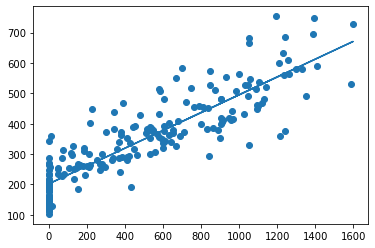

In [200]:
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_train.coef_) + model_train.intercept_)

In [201]:
model_test = LinearRegression()
model_test.fit(x_test, y_test)
model_test.coef_, model_test.intercept_

(array([[0.28801311]]), array([205.83546032]))

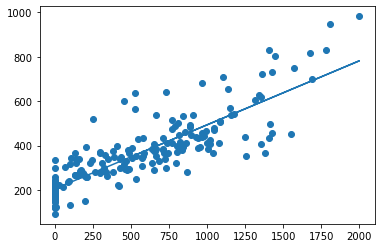

In [202]:
plt.scatter(x_test,y_test)
plt.plot(x_test, np.dot(x_test, model_test.coef_) + model_test.intercept_)

In [203]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, np.dot(x_train, model_train.coef_) + model_train.intercept_)
train_error

4891.547876513964

In [204]:
test_error = mean_squared_error(y_test, np.dot(x_test, model_test.coef_) + model_test.intercept_)
test_error

7242.598838082236

# Question 2

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [206]:
df = pd.read_csv('C:/Users/walte/Desktop/mlnn/5/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [207]:
df_train, df_test = train_test_split(df, test_size=.5)

In [208]:
model = DecisionTreeClassifier(criterion='entropy')

In [209]:
model.fit(df_train.drop(['target'], axis=1), df_train.target)

DecisionTreeClassifier(criterion='entropy')

In [210]:
df_train.drop(['target'] , axis=1).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2


In [211]:
predictions = model.predict(df_test.drop(['target'], axis=1))
df_test.drop(['target'], axis=1).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2


In [212]:
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

In [213]:
accuracy_score(df_test.target, predictions)

0.7105263157894737

In [214]:
confusion_matrix(df_test.target, predictions)

array([[42, 18],
       [26, 66]], dtype=int64)

In [215]:
print(classification_report(df_test.target, predictions))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66        60
           1       0.79      0.72      0.75        92

    accuracy                           0.71       152
   macro avg       0.70      0.71      0.70       152
weighted avg       0.72      0.71      0.71       152

